# Lab 7: Implementing Random Forest 

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.shape

(270, 5)

In [5]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [7]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


## Putting Feature Variable to X and Target variable to y.


In [8]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

## Train-Test-Split is performed


In [9]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.7, 
                                                    random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

## Let’s import RandomForestClassifier and fit the data.


In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, 
                                       n_jobs=-1, 
                                       max_depth=5,
                                       n_estimators=100, 
                                       oob_score=True)
#%%time
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

## Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.



In [12]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_score_

0.6985815602836879

In [14]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

### Now let’s sort the data with the help of feature importance

In [15]:
print(rf_best.feature_importances_)

[0.46128487 0.2180848  0.13174619 0.18888413]


In [16]:
## feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [17]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


## Now, let’s visualize

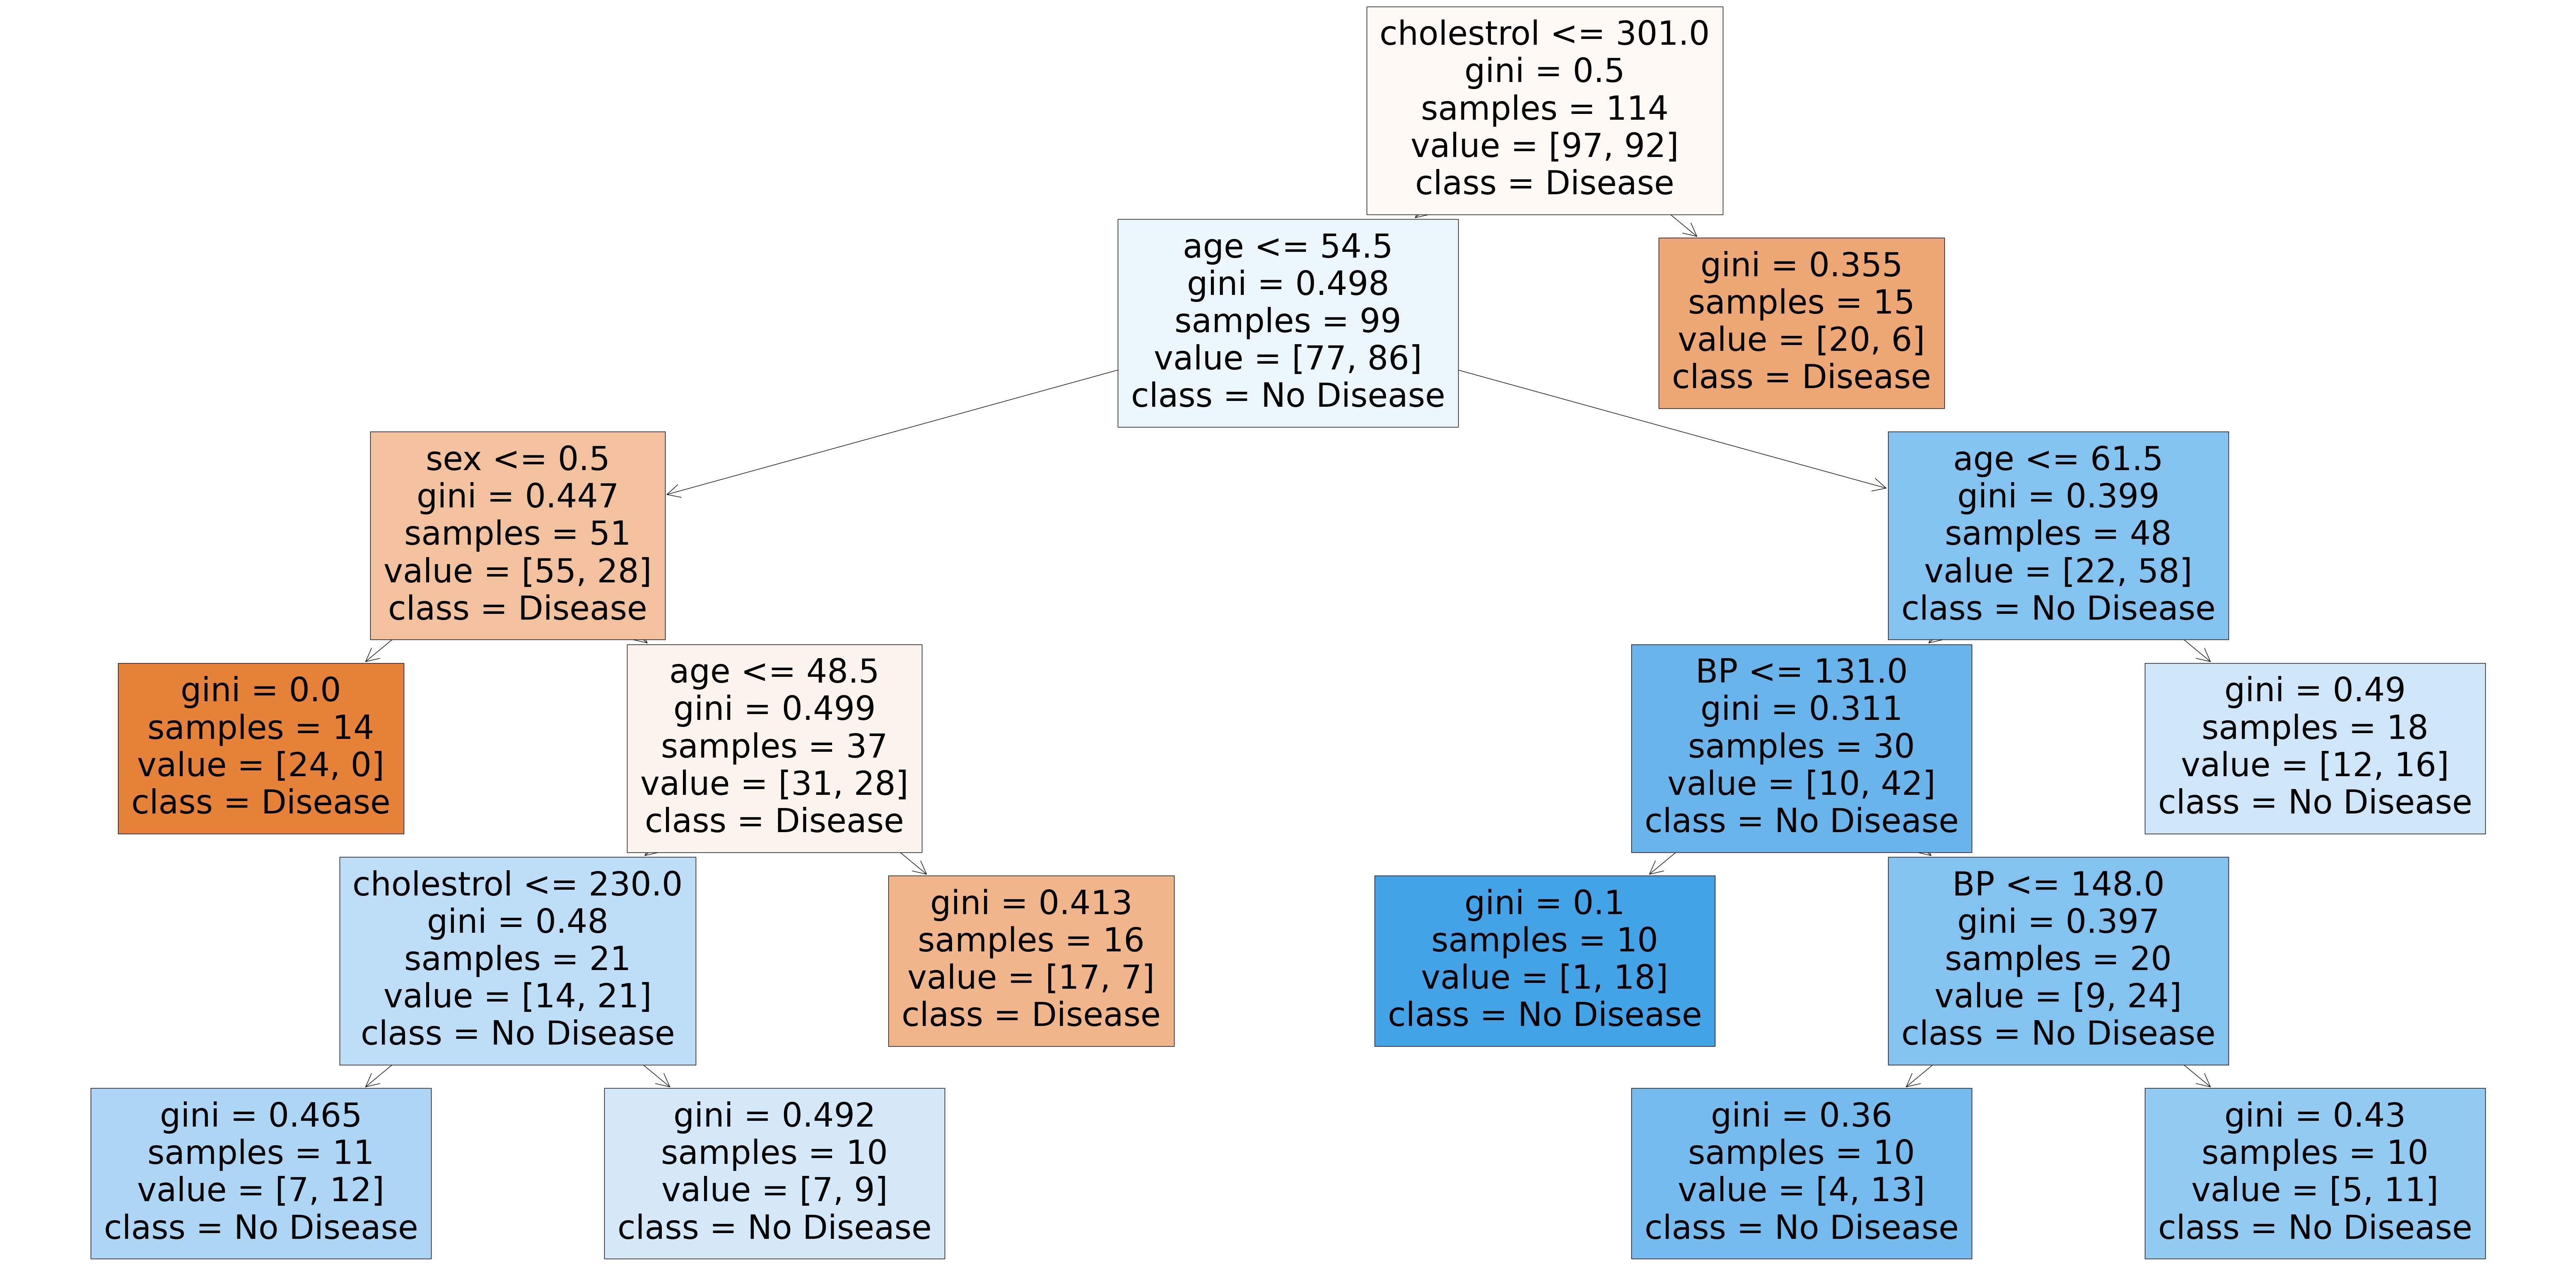

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);


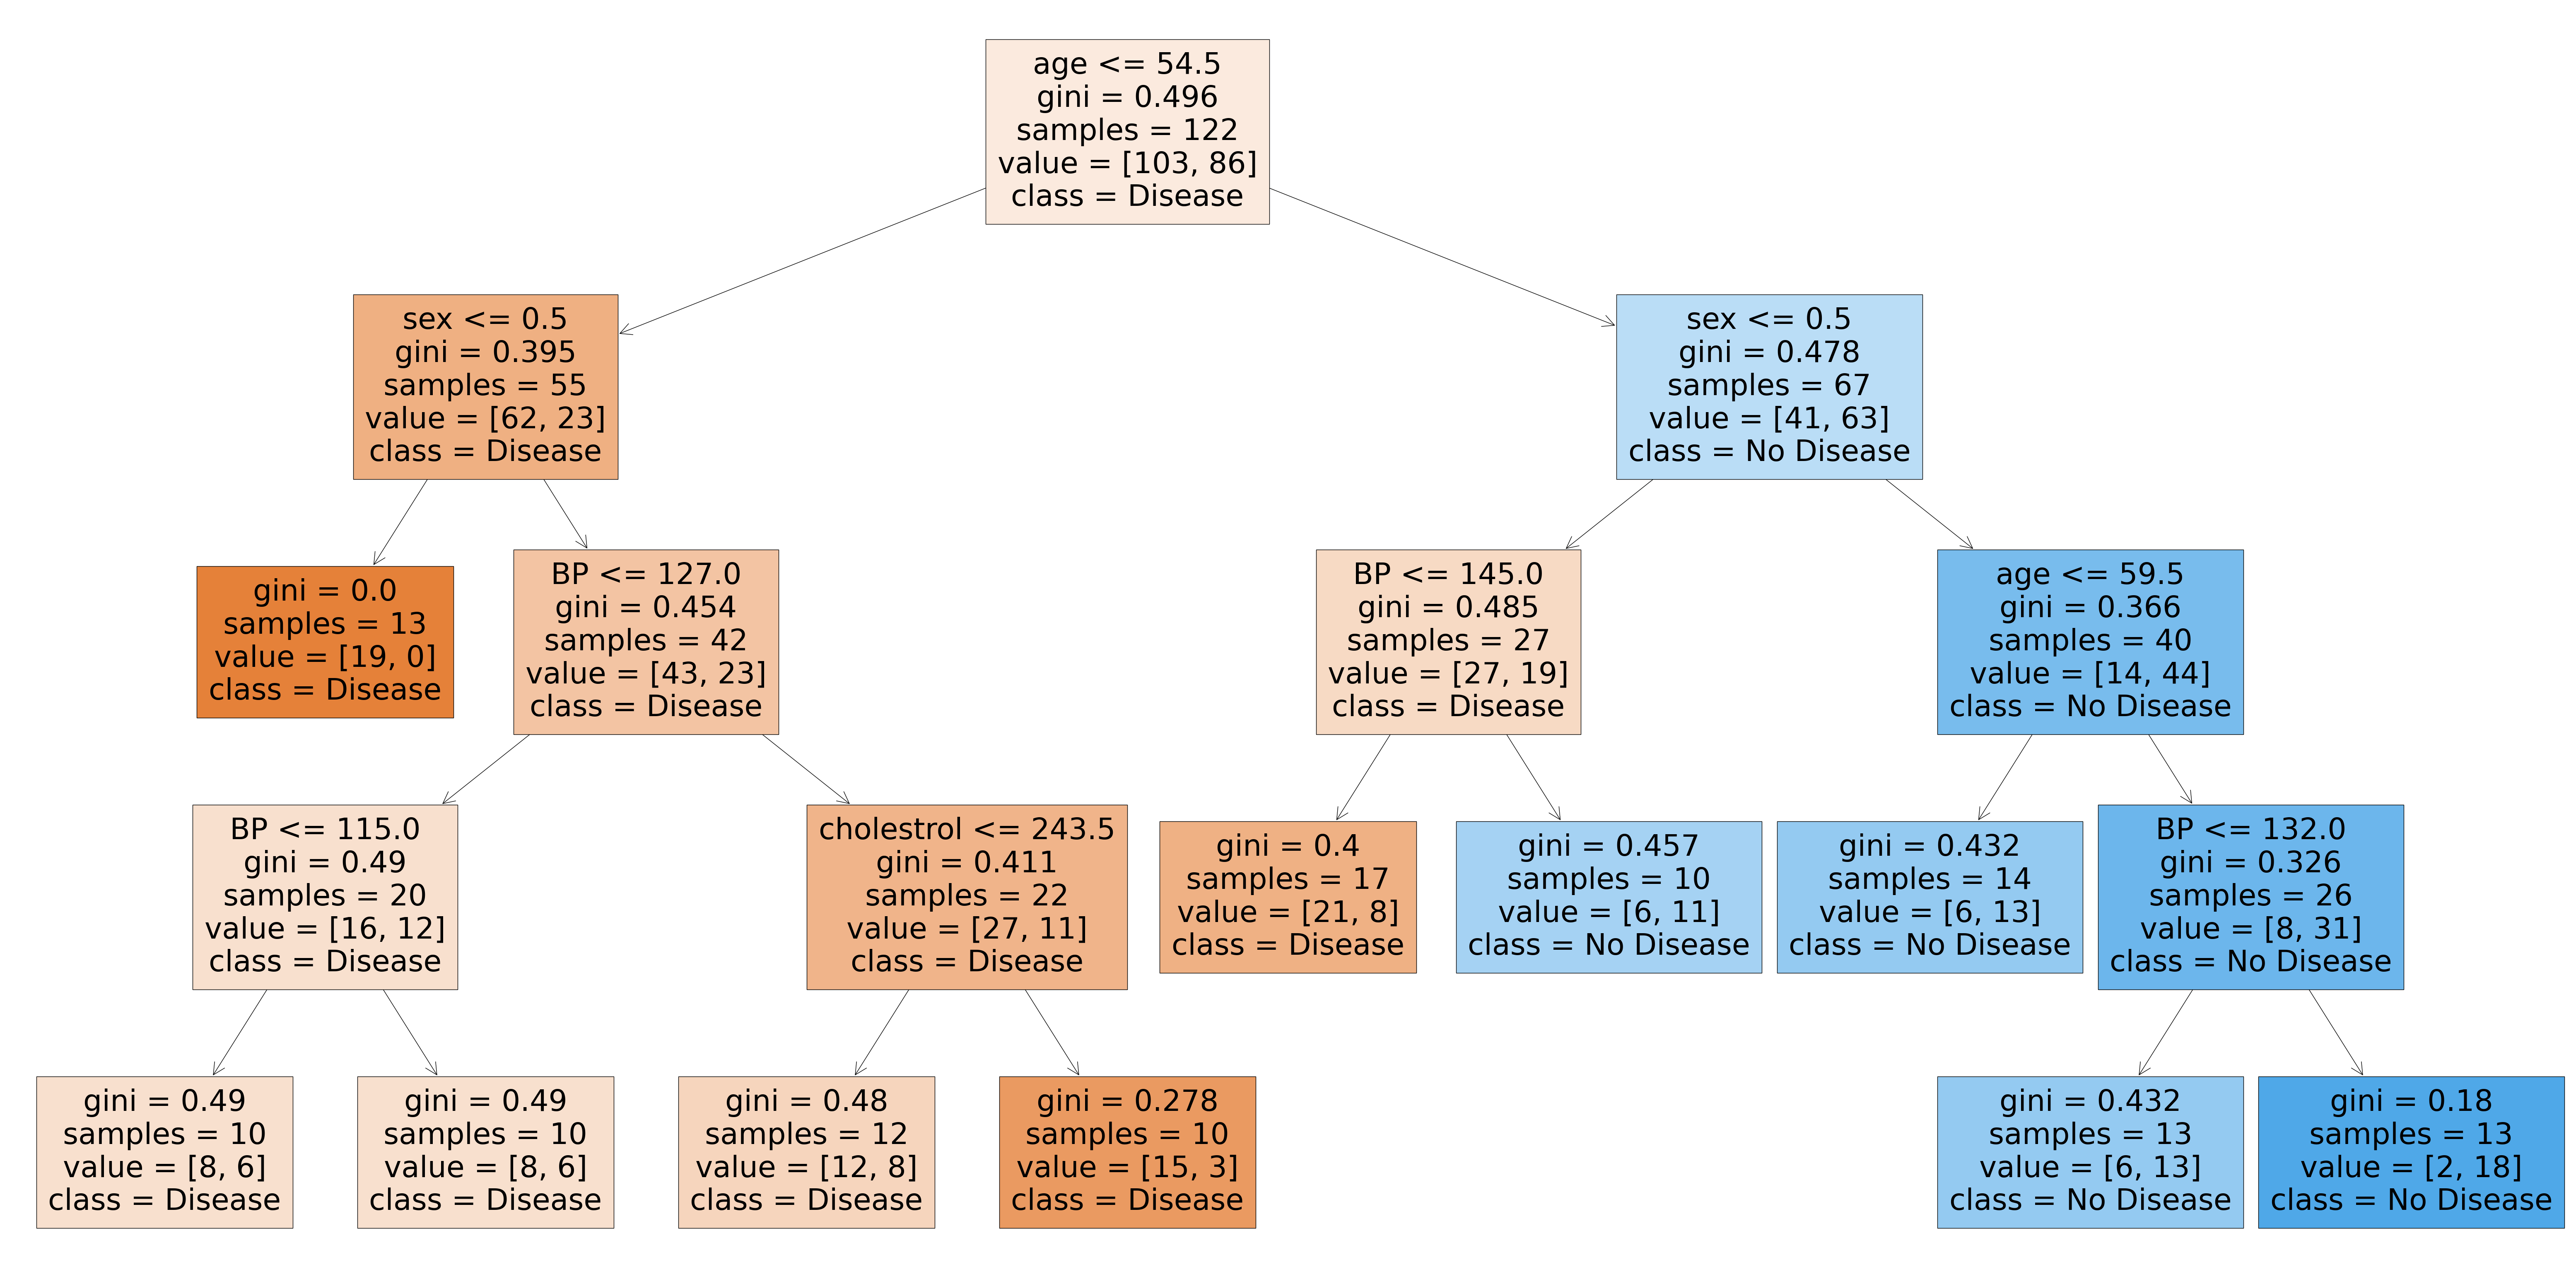

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

# New Model

In [20]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, 
                                                    y, 
                                                    train_size=0.8, 
                                                    random_state=3)
X_train2.shape, X_test2.shape

((216, 4), (54, 4))

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf2 = RandomForestClassifier(random_state=3, 
                                       n_jobs=-1, 
                                       max_depth=11,
                                       n_estimators=100, 
                                       oob_score=True)
#%%time
classifier_rf2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=11, n_jobs=-1, oob_score=True, random_state=3)

In [22]:
# checking the oob score
classifier_rf2.oob_score_

0.6574074074074074

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf2 = RandomForestClassifier(random_state=3, n_jobs=-1)

params = {
    'max_features': [4, 8, 12],  # Reduce the number of options
    'bootstrap': [True, False],
    'max_depth': [10, 30, 50, None],  # Reduce the number of options
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [400, 800, 1200, 1600],  # Reduce the number of options
}

grid_search2 = GridSearchCV(
    estimator=rf2,
    param_grid=params,
    cv=4,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search2.fit(X_train2, y_train2)


Fitting 4 folds for each of 864 candidates, totalling 3456 fits


C:\Users\hplap\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2304 fits failed out of a total of 3456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1152 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hplap\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hplap\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\hplap\anaconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\hplap\anaconda3\lib\site-packages\joblib\parallel.py

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=3),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 30, 50, None],
                         'max_features': [4, 8, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [400, 800, 1200, 1600]},
             scoring='accuracy', verbose=1)

In [24]:
grid_search2.best_score_

0.6898148148148149

In [25]:
rf_best2 = grid_search2.best_estimator_
rf_best2

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400, n_jobs=-1,
                       random_state=3)

In [26]:
print(rf_best2.feature_importances_)

[0.33471592 0.20218123 0.18994066 0.27316218]


In [27]:
## feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best2.feature_importances_
})

In [28]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,age,0.334716
3,cholestrol,0.273162
1,sex,0.202181
2,BP,0.189941
